In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('lr_ex.csv')
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [160]:
X = df["X"].to_numpy().reshape(-1,1) # convert into numpy array and then reshape it to a single varibale 
y = df["Y"].to_numpy().reshape(-1,1) 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(X, y, test_size=0.33)
from sklearn.preprocessing import StandardScaler    #remove the mean and scale
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)


R2 Score =  0.8529510189131949
MSE =  527.4460592439008


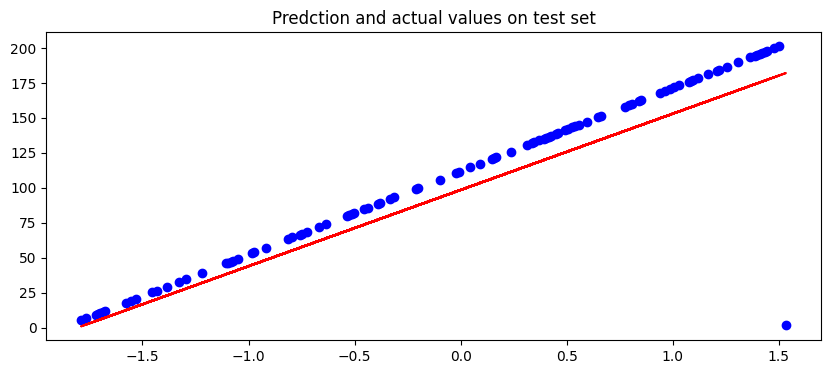

In [161]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train, y_train)
y_pred = mdl.predict(x_test)
r2 = sk.metrics.r2_score(y_test , y_pred) # regression score function, best if 1
mse_test = sk.metrics.mean_squared_error(y_test,y_pred)
print('R2 Score = ',r2)
print('MSE = ',mse_test)

plt.figure(figsize=(10,4))
plt.title("Predction and actual values on test set")
plt.scatter(x_test,y_test, c="blue")
plt.plot(x_test,y_pred, c="red")
plt.show()

In [162]:
mdl.score(x_test,y_test) #accuracy test

0.8529510189131949

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Polynomial Regression

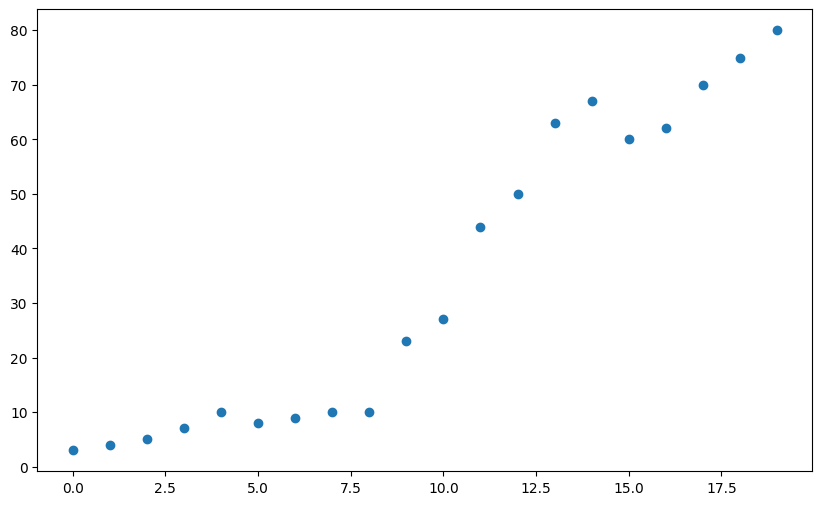

In [163]:
x = np.arange(0,20)
y= [3,4,5,7,10,8,9,10,10,23,27,44,50,63,67,60,62,70,75,80]
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1,1))
mdl.fit(poly_features,y)

LinearRegression()

In [165]:
y_predicted = mdl.predict(poly_features)

In [166]:
y_predicted

array([-1.22792208,  0.79668489,  3.10803144,  5.70611757,  8.59094327,
       11.76250854, 15.2208134 , 18.96585783, 22.99764183, 27.31616541,
       31.92142857, 36.81343131, 41.99217362, 47.4576555 , 53.20987697,
       59.248838  , 65.57453862, 72.18697881, 79.08615858, 86.27207792])

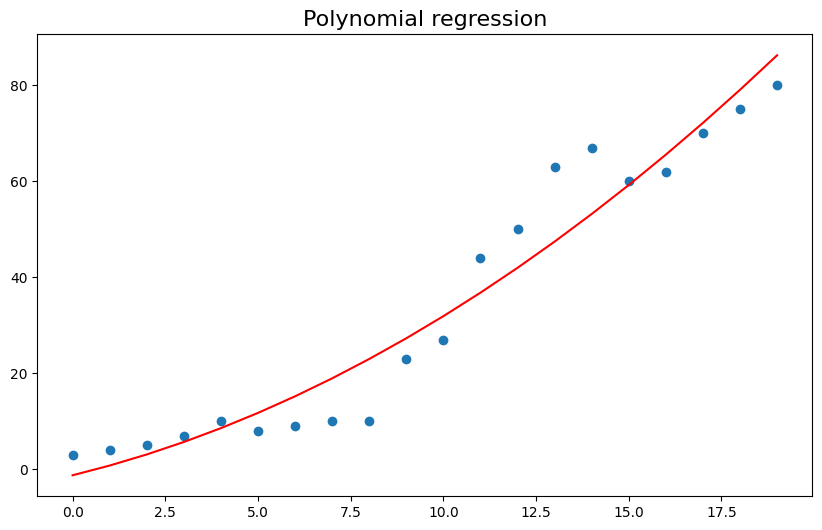

In [167]:
plt.figure(figsize=(10,6))
plt.title("Polynomial regression" ,size = 16)
plt.scatter(x,y)
plt.plot(x, y_predicted, c ="red")
plt.show()

# Lasso Regression

In [168]:
from sklearn.linear_model import Lasso,LassoCV
lasso_cv = LassoCV(alphas=None, cv =10 ,max_iter= 100000) #formula for lsso :  (  1 / ( 2 *n_sample))
lasso_cv.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=100000)

In [169]:
alpha = lasso_cv.alpha_
alpha

0.05451748952514254

In [170]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.05451748952514254)

In [171]:
lasso.predict(x_test)

array([125.94783436, 150.92127493,  58.94592062, 144.83019187,
        15.09012253, 133.86624234,  93.05598579,  73.56451998,
       164.32165768, 164.93076599, 115.59299314, 121.68407621,
        48.5910794 ,  32.14515512,  57.727704  ,  81.48292797,
        54.07305416, 128.99337589, 153.35770816,  55.29127078,
       176.50382382, 119.85675129,  69.30076183, 125.33872605,
       120.4658596 , 169.80363244, 174.06739059,  27.88139697,
        19.35388068,   6.56260624,   5.95349793, 178.94025704,
        97.92885225, 121.0749679 , 111.329235  , 154.57592477,
         5.34438962, 157.012358  , 107.67458515,  12.6536893 ,
        23.00853052, 130.82070081,   4.73528132, 118.63853468,
       142.39375864,  71.12808675,  44.93642956,  74.78273659,
        41.28177972, 149.70305832,  80.26471135, 123.51140113,
        38.84534649, 175.89471551, 127.16605097, 100.97439378,
        77.21916982, 140.56643372,  40.06356311,  45.54553787,
       134.47535065, 107.06547685,   1.08063148, 106.45

In [172]:
lasso.score(x_train,y_train)

0.9381329492431916

In [173]:
mse = np.mean((y_pred - y_test)**2)
mse

527.4460592439008

In [174]:
lasso.score(x_test,y_test)

0.8528901846961998

# Ridge Regression
Do not consider 0 in the data set, values might be near to the zero but not zero

In [175]:
from sklearn.linear_model import Ridge,RidgeCV
alphas = np.random.uniform(0,10,50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(x_train,y_train)


RidgeCV(alphas=array([4.82389026, 1.19223313, 3.92193244, 0.02737331, 1.65046426,
       6.71649851, 3.9105721 , 7.48018125, 6.81179385, 2.49521463,
       1.79812474, 8.85489749, 0.32720748, 7.88995254, 5.1678333 ,
       0.25626158, 5.38579064, 4.40291706, 9.0787509 , 4.11726389,
       1.00987893, 9.177319  , 4.56635961, 0.33525254, 4.59880733,
       1.95123075, 3.82182138, 7.38700759, 4.48545832, 6.82873076,
       8.67042063, 3.64170238, 6.46563347, 0.25535694, 9.16113506,
       6.72560013, 0.95289207, 0.93903812, 1.53594197, 8.21583694,
       4.51173186, 2.23434663, 9.04218184, 5.73264095, 1.03524416,
       8.26987712, 2.92237418, 9.04729723, 3.60970562, 2.54952939]),
        cv=10)

In [177]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train , y_train)

Ridge(alpha=0.3352525403265816)

In [178]:
ridge.score(x_train,y_train)

0.9381312862035185

In [179]:
ridge.score(x_test,y_test)

0.8528488033245073